# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
25.1.2022<br>
Team G03: Eric Keränen - Samuel Aitamaa - Teemu Luhtanen<br>
Metropolia University of Applied Sciences

## 1. Introduction

This report shows the data preprocessing, datasplitting, model creation, model training and displaying the results of a neural network based on [Heart Disease Health Indicators Dataset (Kaggle)](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset).

The main objectives of this project is to predict the precense of disease or not, with the simplest, fastest and smallest network as possible, while aiming to a <u>**high sensitivity without losing specificity**</u>.

## 2. Setup

We used libraries, such as matplotlib, pandas, seaborn, tensorflow, sklearn and keras:

In [1]:
%pylab inline
import time
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as split
from tensorflow.keras import models, layers, losses, metrics, optimizers

print(f"Tensorflow version: {tf.__version__}")

Populating the interactive namespace from numpy and matplotlib
Tensorflow version: 2.7.0


## 3. Dataset

This dataset consists of 253 679 diagnoses (1 = has a diagnose, 0 = doesn't have) of heart diseases and 21 indicators as floating point numbers for each diagnose, such as blood pressure, cholesterol and age. These indicators are used to train, validate and test the model of our choosing based on the diagnoses.

In [2]:
df = pd.read_csv("heart_disease_health_indicators.csv", na_values = "?")
df.tail(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253671,1.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,1.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


## 4. Preprocessing

We preprocess the data by using the <code>fillna()</code> function, that fills all 'not applicable' values with zero and does it so "in place" (meaning it will not create a new data object, but modify the existing one). In the dataset section we also do a little preprocess function by replacing all '?' values with 'not applicable' values by using the <code>na_values = '?'</code> parameter.

No conversion to numerical data was needed, since all data was numerical.

In [3]:
df.fillna(0, inplace = True)
df.describe().round()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,...,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
mean,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,4.0,0.0,0.0,8.0,5.0,6.0
std,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,7.0,9.0,0.0,0.0,3.0,1.0,2.0
min,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,4.0,5.0
50%,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,7.0
75%,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,3.0,0.0,1.0,10.0,6.0,8.0
max,1.0,1.0,1.0,1.0,98.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,1.0,13.0,6.0,8.0


After filling the missing values, we extract the labels (correct evaluations) into a <code>labels</code>-variable. We also extract the data itself from the labels, meaning the features that determine the evaluation, into a <code>data</code>-variable.

With these variables we split the original dataset into a train dataset, validation dataset and test dataset. The dataset is split with the 80 / 20 rule of thumb. With this rule of thumb we first split the original data into a train dataset and test dataset with 80 % going to training and 20 % going to testing. After this we repeat the procedure and split the training data even further with the 80 / 20 rule of thumb. Now the training dataset (80 % of the original dataset) will be split into a training set and validation set with 80 % going to training and 20 % going to validation. This means that the original dataset will be split as follows:

|Set|Amount allocated|
|---|:---:|
|Training set|64 %|
|Validation set|16 %|
|Test set|20 %|

All datasets were also normalized. We created a <code>normalize()</code>-function, that does tha normalization for every dataset.

In [4]:
labels = df["HeartDiseaseorAttack"]
data = df.drop("HeartDiseaseorAttack", axis = 1)

In [5]:
train_data, test_data, train_labels, test_labels = split(data, labels, test_size=0.20, train_size=0.80, random_state=0, shuffle = True)
train_data, validation_data, train_labels, validation_labels = split(train_data, train_labels, test_size=0.20, train_size=0.80, random_state=0)

def normalize(train_data, test_data, validation_data):
    mu = np.mean(train_data, axis=0)
    std = np.std(train_data, axis=0)
    train_data_normalized = (train_data - mu) / std
    test_data_normalized = (test_data - mu) / std
    validation_data_normalized = (validation_data - mu) / std
    return train_data_normalized, test_data_normalized, validation_data_normalized

train_data, test_data, validation_data = normalize(train_data, test_data, validation_data)

train_percentage = (train_data.count()[0] / data.count()[0]).round(2) * 100
validation_percentage = (validation_data.count()[0] / data.count()[0]).round(2) * 100
test_percentage = (test_data.count()[0] / data.count()[0]).round(2) * 100

print (f"Training set: {train_percentage} % of the original dataset")
print (f"Validation set: {validation_percentage} % of the original dataset")
print (f"Test set: {test_percentage} % of the original dataset")

Training set: 64.0 % of the original dataset
Validation set: 16.0 % of the original dataset
Test set: 20.0 % of the original dataset


We also opted to make weights for the evaluations, since ~90 % of the data is classified as healthy and only ~10 % is classified as diseased. These weights will be used when training the model.

In [6]:
values, counts = np.unique(train_labels, return_counts = True)
healthy = counts[0]
disease = counts[1]
total = healthy + disease
print(f"Healthy amount: {100 * healthy / total} %")
print(f"Diseased amount: {100 * disease / total} %")

healthyWeight = 1 / healthy * (total / 2.0)
diseaseWeight = 1 / disease * (total / 2.0)
class_weight = {0: healthyWeight, 1: diseaseWeight}

Healthy amount: 90.55957623725786 %
Diseased amount: 9.440423762742139 %


## 5. Modeling

After preprocessing, we created two functions, which create two kinds of models. The first function <code>make_model_1l</code> makes a model with one hidden layer with the amount of neurons in the parameter. The second function <code>make_model_2l</code> makes a model with two hidden layers where the first hidden layer gets its neurons from the first parameter and the second hidden layer gets its neurons from the second parameter. This way we can test many different models containing different amount of neurons. We decided to only use one or two hidden layers, since we wanted to make the model as simple as possible. For the hidden layers we used <code>activation = 'relu'</code> which is the most common choice of activation function in the world of deep learning. The last layer is the output layer with <code>activation = 'sigmoid'</code> which is a mathematical function for logistics.

The models also compile with an optimizer algorithm called <code>RMSprop</code> which maintains a moving average of the square of gradients and divides the gradient by the root of this average. For loss a <code>BinaryCrossentropy</code> algorithm is used, since this problem is binary classification. Binary cross-entropy computes the cross-entropy loss between true labels and predicted labels. As for the metrics we want to know the accuracy and recall of the model, these metrics calculate how often predictions match binary labels. Since we are aiming for high sensitivity, recall is important to us, since [sensitivity essentially means recall](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).

The following tests were made:

|Hidden layers|Amount of neurons|Validation Accuracy|Validation Recall|
|-------------|-----------------|-------------------|-----------------|
|1|10 N|73 %|80 %|
|2|5 N / 5 N|71 %|83 %|
|1|20 N|74 %|79 %|
|2|10 N / 10 N|72 %|80 %|
|1|5 N|74 %|80 %|
|2|2 N / 2 N|73 %|81 %|
|1|4 N|72 %|82 %|

From the table we can see that the result are very similar accross all tests. <u>We decided pick the last one with <strong>one hidden layer</strong> which has <strong>four neurons</strong> as the final model</u>. This achieves our goal of using the most simple model available.

In [7]:
def make_model_1l(neurons):    
    model = models.Sequential([
        layers.Dense(neurons, activation = "relu", input_shape = (21,)),
        layers.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = ["Accuracy", "Recall"]
    )
    
    return model

def make_model_2l(neurons_1l, neurons_2l):    
    model = models.Sequential([
        layers.Dense(neurons_1l, activation = "relu", input_shape = (21,)),
        layers.Dense(neurons_2l, activation = "relu"),
        layers.Dense(1, activation = "sigmoid")
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = "binary_crossentropy",
        metrics = ["Accuracy", "Recall"]
    )
    
    return model

model = make_model_1l(4)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


Above you can see the summary of our model.

## 6. Training

We trained our selected model with train_labels (diagnoses) and train_data (indicators). These were passed as parameters. The training was timed with the time library. We tested the model with epochs ranging from 1-15 and a batch size from 32-500. The values were adjusted based on their performance and evaluation. For the final settings we chose 15 epochs, and a batch size of 32. Training takes ~52.7 seconds total with ~3.5 seconds for each epoch.

In [8]:
EPOCHS = 15
BATCH_SIZE = 32

t0 = time.time()
history = model.fit(
    train_data,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    class_weight = class_weight,
    validation_data = (validation_data, validation_labels),
    verbose = 0
)
t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime / EPOCHS:.3f} s/epoch')

Total elapsed time 52.65 s and 3.510 s/epoch


In [9]:
print(f"Accuracy: {round(history.history['Accuracy'][-1], 2)} %")
print(f"Recall: {round(history.history['recall'][-1], 2)} %")
print(f"Val Accuracy: {round(history.history['val_Accuracy'][-1], 2)} %")
print(f"Val Recall: {round(history.history['val_recall'][-1], 2)} %")

Accuracy: 0.73 %
Recall: 0.81 %
Val Accuracy: 0.74 %
Val Recall: 0.8 %


## 7. Performance and evaluation

In this section we are displaying the loss value and accuracy on each epoch with plots for both training and validation.

Validating the model outputs are important to ensure the model's accuracy. During training we use a huge amount of training data. The main aim of validating the model in the last section is that it provides an opportunity for us to improve the settings.

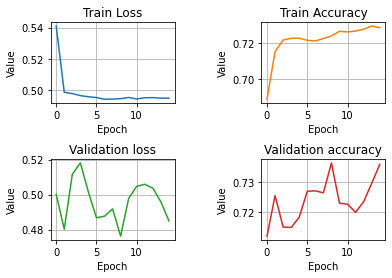

In [11]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['Accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_Accuracy']

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.7, wspace=0.7)
axs[0, 0].plot(epochs, loss)
axs[0, 0].set_title('Train Loss')
axs[0, 0].grid()
axs[0, 1].plot(epochs, acc, 'tab:orange')
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].grid()
axs[1, 0].plot(epochs, val_loss, 'tab:green')
axs[1, 0].set_title('Validation loss')
axs[1, 0].grid()
axs[1, 1].plot(epochs, val_acc, 'tab:red')
axs[1, 1].set_title('Validation accuracy')
axs[1, 1].grid()

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Value')

We can see that the training loss value changes significantly during the first epoch (so called Elbow point), and only mildly after those. The lower the models loss is, the better the model is in predicting. Loss is defined as the difference between the predicted value by the model and the true value. All the other values are changing throughout the whole 15 epochs, but mainly achieving their final form during the first five epochs. This means that the model gains a significant accuracy during the first five epochs and a low loss, meaning that the model is accuarate in predicting the correct choice. For this reason we chose 15 epochs to optimize the runtime and accuracy/loss values of the model. Higher amount of epochs resulted in more unpredictable results. For training we got loss of 49.5 % and accuracy of 72.8 %, for validation we got loss of 48.5 % and accuracy of 73.6 %, for test we got loss of 48.6 % and accuracy of 73.5 % (seen below).

These plots can be explained by the things that happen in the neural network during training. For each epoch the accuracy rises and the loss get lower since the parameters in the neurons get changed to more optimal values to predict the outcome. In the training section we defined the <code>BATCH_SIZE</code>-variable, which determines how many instances will be checked before changing the parameters in the neurons. The lower the batch size the more parameter changes will occur, but also the runtime gets a lot longer. We achieved really good accuracy and low loss with the current batch size of 32. An even lower amount of epochs would've sufficed, but we wanted to be more certain of the results.

In [12]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')

Training loss = 0.495
Training accuracy = 0.728


In [13]:
print(f'Validation loss = {val_loss[-1]:.3f}')
print(f'Validation accuracy = {val_acc[-1]:.3f}')

Validation loss = 0.485
Validation accuracy = 0.736


In [14]:
test_loss, test_accuracy, test_recall = model.evaluate(test_data, test_labels, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_accuracy:.3f}')
print(f'Test recall = {test_recall:.3f}')

Test loss = 0.486
Test accuracy = 0.735
Test recall = 0.813


## 7.1 Final performance

Here we use the test set (20 % of the orignal set) on the trained model and evaluate how well the model performed.  

We created a confusion matrix and a classification report, that display all of the final performance results of the model. The <code>THRESHOLD</code>-variable determines how accurate the prediction must be so that it will be taken into account in the final evaluation. In this case it must be at least 50 % accurate. The lower the threshhold is, the more data will be taken into account, but the data will be less accurate.

In [15]:
THRESHOLD = 0.5

predictions = model.predict(test_data)
pred_labels = 1.0 * (predictions >= THRESHOLD)
cm = confusion_matrix(test_labels, pred_labels)

tn, fp, fn, tp = confusion_matrix(test_labels, pred_labels).ravel()
print(f'              Confusion matrix      ')
print(f'                 Prediction         ')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix      
                 Prediction         
Diagnose  Healthy   Disease      SUM
Healthy     33410     12554    45964
Disease       893      3879     4772
SUM         34303     16433    50736


We also made a graph of the confusion matrix for clarity.

<AxesSubplot:>

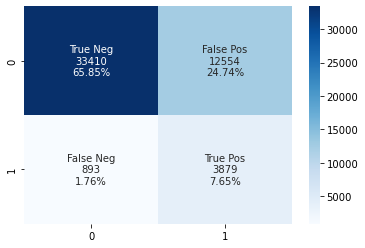

In [16]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

From this graph of the confusion matrix, we can see that out of the ~10 % diseased population 7.65 % were found diseased and classified as such correctly which achieves for us a high sensitivity / recall.

In [17]:
cr = classification_report(test_labels, pred_labels, target_names = ['Healthy', 'Disease'])
print(cr)

              precision    recall  f1-score   support

     Healthy       0.97      0.73      0.83     45964
     Disease       0.24      0.81      0.37      4772

    accuracy                           0.73     50736
   macro avg       0.61      0.77      0.60     50736
weighted avg       0.90      0.73      0.79     50736



In [18]:
print(f'Precision for Healthy = {tn/(tn+fn):.2f}')
print(f'Precision for Disease = {tp/(fp+tp):.2f}')
print(f'Sensitivity = {tp/(tp+fn):.2f}')
print(f'Specificity = {tn/(tn+fp):.2f}')

Precision for Healthy = 0.97
Precision for Disease = 0.24
Sensitivity = 0.81
Specificity = 0.73


The main objective in this model was to achieve a <u>high sensitivity and specificity rate</u>. With the trained model and test set we got a sensitivity rate of 81 % and a specifity rate of 73 %. The sensitivity rate can be seen from the confusion matrix graph, where 7.65 % of the ~10 % of the diseased population was classified correctly.

Achieving high sensitivity will cause the precision of the diseased to drop significantly, so we needed to find a sweet spot for the sensitivity and precision. This was accomplished by tweaking the values of <code>THRESHOLD</code>, <code>BATCH_SIZE</code>, <code>EPOCHS</code>, hidden layers and neurons.

# 8. Discussion and conclusions

We tested different settings to find the best, simplest and fastest way to get reasonably good results with the model. We started by changing the amount of neurons and hidden layers. Results didn't improve much by adding hidden layers so we decided to only use one hidden layer and tried to find the smallest amount for neurons. We tested different models where the range of neurons varied from 20 to 2 and got almost the same results, except with 2 neuron where we got errors regarding dividing by zero. So we decided to use four neurons because to be sure no errors happen.

We continued by changing epochs and batch size. With higher epoch values (e.g. 100 epochs), we didn't get any better results and the runtime was much longer than with lower epoch values. That is why we decided to try lower epoch values and with 15 epochs, we got the best results and the runtime was faster. We also tried changing batch size but we came to a conclusion that 32 was the best. With even lower values, the runtime would suffer a lot and with higher values results suffered a little.

Lastly, we set the <code>THRESHOLD</code>-value to 0.5. We also tried with values ranging from 0.2 to 0.7.

So we got the best model with the following settings:

|Setting|Value|
|--|--|
|Neurons|4|
|Hidden layers|1|
|Epochs|15|
|Batch size|32| 
|Threshold|0.5|

The model achieved a moderately good performance with our settings. The final performance results with these settings were as follows:

|Metric|Value|
|--|--|
|**Sensitivity / Recall**|**81 %**|
|Specificity|73 %|
|Test Accuracy|73.5 %|
|Test Loss|48.6 %|
|Execution time|52.65 s|

### 8.1 Main observations and learning points

We observed that for this dataset a model consisting of one hidden layer with four neurons was enough. Increasing or decreasing the batch size from 32 didn't accomplish better results for our goal. For epochs, 15 was the most effective one relative to its runtime. That is to say we learned that neural networks don't need to be overly large and complex to achieve relatively good results. We learned to work with datasets using Python and various libraries, such as Pandas, Tensorflow, Seaborn and Scikit-learn.

### 8.2 Model improvements

We spent a lot of time tweaking the settings to find the best ones that achieve best results for the aim of the report. The aim of the report in this case was to find the best solution for high sensitivity without losing too much specificity. The model of course can be even more improved with better settings, we chose to use a more simpler model (which was also an aim of this report) to achieve this goal. This meant that we had to sacrifice a little bit of sensitivity and specificity. The model can be a little more complex, which would amount to a better result, but not too much better.

The model can be tweaked in many ways depending on what you want to accomplish with it. This is the reason why for example our models accuracy is not so high like it could be.
